In [1]:
# datasetX, principle components U, the numbers of dimensions to reduce to k
import time
import numpy as np
# sklearn are prohibited
import os
#import sklearn
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from PIL import Image
import random

from sklearn.cluster import KMeans

load image

In [2]:
path = "/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed"

#path = 'PL/2019/05/08/' #jpg
#image= misc.imread(path + filenamelist[0], flatten= 0)

processedimage_path = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            processedimage_path.append(os.path.join(r, file))

len(processedimage_path)

175895

In [3]:
x = mpimg.imread(processedimage_path[0]) #(2469, 4870)

In [4]:
x[0:x.shape[0], 0:x.shape[1]//3].shape

(102, 121, 3)

In [5]:
x[0:x.shape[0], x.shape[1]//3:x.shape[1]//3*2].shape

(102, 121, 3)

In [6]:
1461 / 3

487.0

In [7]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [9]:
normal_image = []
error_image = [] 
for i in processedimage_path[0:len(processedimage_path)//5]:
    img = mpimg.imread(i) #(617, 1461)
    normal_image.append(img[0:img.shape[0], 0:img.shape[1]//3]/255)
    error_image.append(NormalizeData(img[0:img.shape[0], img.shape[1]//3:img.shape[1]//3*2]/255))

In [10]:
hh = 46

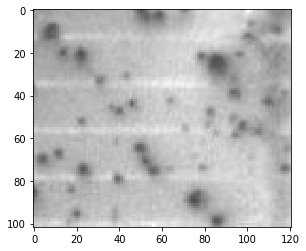

In [11]:
plt.imshow(normal_image[hh])

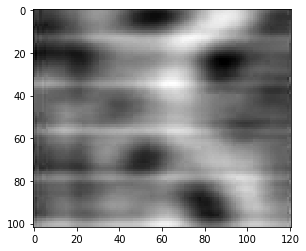

In [12]:
plt.imshow(error_image[hh])

In [13]:
np.max(normal_image[hh])

0.9921568627450981

In [14]:
np.max(error_image[hh])

1.0

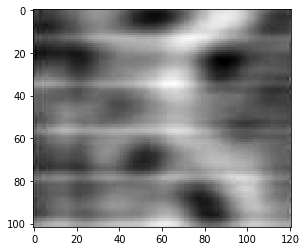

In [15]:
plt.imshow(error_image[hh]*(np.max(normal_image[hh])/np.max(error_image[hh])))

In [16]:
# plt.imsave('test.jpg', error_image[hh])

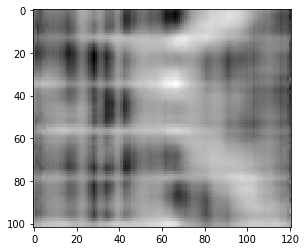

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(normal_image[hh][:, :, 0])
scaler.transform(normal_image[hh][:, :, 0])
plt.imshow(scaler.transform(error_image[hh][:, :, 0]), cmap='gray')

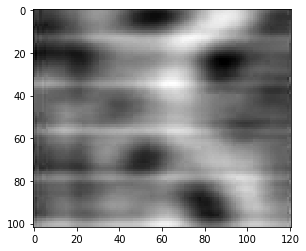

In [18]:
plt.imshow(NormalizeData(error_image[hh]))

In [19]:
image_list = normal_image + error_image

In [20]:
len(normal_image)

35179

In [21]:
len(error_image)

35179

In [22]:
len(image_list)

70358

In [23]:
image_list[0].shape

(102, 121, 3)

In [24]:
# for i in range(len(image_list)):
#     plt.imsave("/media/chang_1909004/970pro/PL/test/" + str(i)  + ".jpg", image_list[i], cmap='gray')   

image label

In [25]:
error_label = np.ones([len(error_image)])

In [26]:
len(error_label)

35179

In [27]:
normal_label = np.zeros([len(normal_image)])

In [28]:
len(normal_label)

35179

In [29]:
label = np.concatenate([error_label, normal_label])

In [30]:
len(label)

70358

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# plt.imshow(image_list[0], cmap='gray')

In [33]:
image_list[0].shape

(102, 121, 3)

In [34]:
from keras.datasets import mnist
from keras.utils import to_categorical

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape((60000, 28, 28, 1))
# x_train = x_train.astype('float32') / 255

# x_test = x_test.reshape((10000, 28, 28, 1))
# x_test = x_test.astype('float32') / 255

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# label = len(y_train[0])
#png_imagelist = np.repeat(np.asarray(png_imagelist)[..., np.newaxis], 1, -1)
#image_list = np.asarray(image_list).reshape((len(image_list), image_list[0].shape[0], image_list[0].shape[1], 1))
# image_list = np.asarray(image_list)[:, :, :, 1]
# image_list = image_list.reshape((len(image_list), image_list[0].shape[0], image_list[0].shape[1], 1))

image_list = np.asarray(image_list).astype('float32')# / 255
label = to_categorical(label)
x_train, x_test, y_train, y_test = train_test_split(image_list, label, test_size=0.3, random_state=1)

Using TensorFlow backend.


In [35]:
label = len(y_train[0])

In [36]:
x_train[0].shape

(102, 121, 3)

[1. 0.]


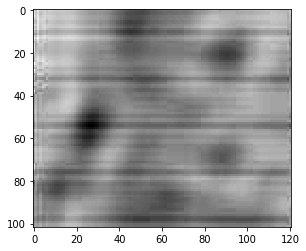

In [37]:
i = 5
plt.imshow(x_train[i])#, cmap='gray')
print(y_train[i])

In [38]:
y_train[i]

array([1., 0.], dtype=float32)

In [39]:
x_train[i].shape

(102, 121, 3)

binaryCheck model

In [40]:
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from keras.layers import GRU, Flatten, AveragePooling2D, Lambda
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras import backend as K
import h5py
from keras.optimizers import SGD

In [41]:
def global_average_pooling(x):
    return K.mean(x, axis = (2, 3))

def global_average_pooling_shape(input_shape):
    return input_shape[0:2]

In [42]:
x_train[0].shape

(102, 121, 3)

In [43]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_list[0].shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Conv2D(128, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Conv2D(128, (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(layers.Conv2D(16, (8, 8), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [44]:
label

2

In [45]:
model.add(layers.Flatten()) 
# model.add(Dense(256, activation='relu', input_shape=image_list[0].shape))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Lambda(global_average_pooling, 
#           output_shape=global_average_pooling_shape))
#model.add(Dense(64, activation='relu'))
model.add(Dense(label, activation='softmax'))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 119, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 11, 64)         36928     
__________

In [47]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (49250, 102, 121, 3)
49250 train samples
21108 test samples
y_train shape: (49250, 2)


In [48]:
# from keras.utils import multi_gpu_model

# model = multi_gpu_model(model, gpus=2)
# print("hehe")  

In [49]:
from keras import backend as K

In [50]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=3, batch_size=48)

Instructions for updating:
Use tf.cast instead.
Train on 49250 samples, validate on 21108 samples
Epoch 1/3
49250/49250 [==============================] - 32s 650us/step - loss: 0.0650 - acc: 0.9740 - val_loss: 0.0792 - val_acc: 0.9738
Epoch 2/3
49250/49250 [==============================] - 27s 550us/step - loss: 0.0190 - acc: 0.9961 - val_loss: 0.0104 - val_acc: 0.9976
Epoch 3/3
49250/49250 [==============================] - 27s 546us/step - loss: 0.0274 - acc: 0.9961 - val_loss: 0.0156 - val_acc: 0.9958


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 119, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 59, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 57, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 11, 64)         36928     
__________

GCAM

In [190]:
def gradcam(model, x):
    # 取得影像的分類類別
#     preds = model.predict(np.expand_dims(x, axis=0))
    preds = model.predict(x)
    pred_class = np.argmax(preds[0])
    
    # 取得影像分類名稱
    pred_class_name = {0: "PCA", 1: "noise"}
    
    # 預測分類的輸出向量
    pred_output = model.output[:, pred_class]
    
    # 最後一層 convolution layer 輸出的 feature map
    # ResNet 的最後一層 convolution layer
    last_conv_layer = model.get_layer('conv2d_1')
    
    # 求得分類的神經元對於最後一層 convolution layer 的梯度
    grads = K.gradients(pred_output, last_conv_layer.output)[0]
    
    # 求得針對每個 feature map 的梯度加總
    pooled_grads = K.sum(grads, axis=(1, 2, 3))
    
    # K.function() 讓我們可以藉由輸入影像至 `model.input` 得到 `pooled_grads` 與
    # `last_conv_layer[0]` 的輸出值，像似在 Tensorflow 中定義計算圖後使用 feed_dict
    # 的方式。
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    
    # 傳入影像矩陣 x，並得到分類對 feature map 的梯度與最後一層 convolution layer 的 
    # feature map
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # 將 feature map 乘以權重，等於該 feature map 中的某些區域對於該分類的重要性
    for i in range(pooled_grads_value.shape[0]):
        conv_layer_output_value[:, :, i] *= (pooled_grads_value[i])
        
    # 計算 feature map 的 channel-wise 加總
    heatmap = np.sum(conv_layer_output_value, axis=-1)
    
    return heatmap, pred_class_name

In [212]:
def plot_heatmap(heatmap, pred_class_name):
    # ReLU
    heatmap = np.maximum(heatmap, 0)
    
    # 正規化
    heatmap /= np.max(heatmap)
    
    # 讀取影像
    img = cv2.imread(pred_class_name)
    img = img[:, 0:img.shape[1]//3]
    
    fig, ax = plt.subplots(1, 3, figsize = (18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
    
    #im = cv2.resize(cv2.imread(img_path), (img.shape[1], img.shape[0]))

    # 拉伸 heatmap
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap = np.uint8(255 * heatmap)
    
    # 以 0.6 透明度繪製原始影像
    ax[0].imshow(img, alpha=0.6)
    
    # 以 0.4 透明度繪製熱力圖
    ax[0].imshow(heatmap, cmap='rainbow', alpha=0.3)
    
    ax[1].imshow(heatmap)
    
    ax[2].imshow(img)
    
    #plt.title(pred_class_name)
    plt.savefig("predict_example/" + pred_class_name.replace("/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/", ""), bbox_inches='tight')
    
    #plt.show()

In [213]:
from keras.applications.resnet50 import ResNet50, preprocess_input
import cv2

In [214]:
x_train[7].shape

(102, 121, 3)

In [209]:
# img_path = "/media/chang_1909004/970pro/PL/hhee.jpg"

AttributeError: 'dict' object has no attribute 'replace'

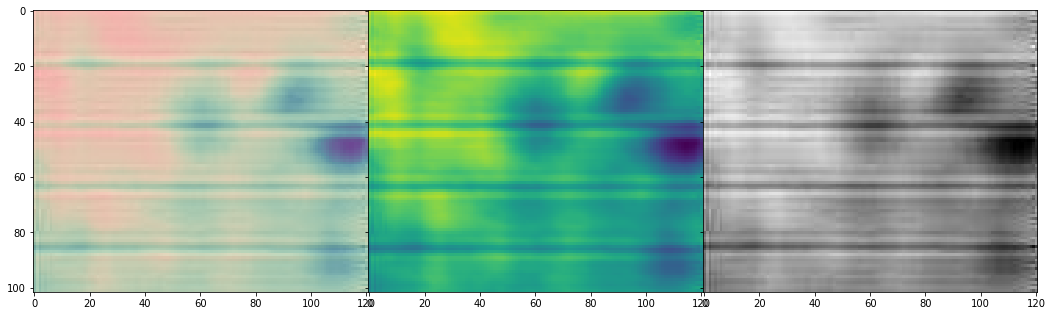

In [210]:
hh = 1400
# model = ResNet50(weights='imagenet')

plt.imsave(img_path, x_train[hh])  

img = mpimg.imread(img_path)

img = np.expand_dims(img, axis=0)

# 將 RBG 轉換為 BGR，並解減去各通道平均
#img = preprocess_input(img)

heatmap, pred_class_name = gradcam(model, img)

plot_heatmap(heatmap, img_path, pred_class_name)

In [ ]:
#hh = 5
# model = ResNet50(weights='imagenet')

#plt.imsave("predict_example/" + processedimage_path[hh].replace("/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/", "") + "_" + str(hh), mpimg.imread(processedimage_path[len(processedimage_path)//5 + hh])[:, 0:121])  

for i in processedimage_path[len(processedimage_path)//5:]:
    
#     img = mpimg.imread(i)[:, 0:121]
    img = img[:, 0:img.shape[1]//3]
    img = np.expand_dims(img, axis=0)

# 將 RBG 轉換為 BGR，並解減去各通道平均
#img = preprocess_input(img)

    heatmap, pred_class_name = gradcam(model, img)

    plot_heatmap(heatmap, i)

/home/chang_1909004/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


In [176]:
processedimage_path[0].replace("/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/", "")

'compared_3000_6000_PL_2019_08_16_19815LAE_46_A1M38D0111_401.jpg'

In [177]:
processedimage_path[len(processedimage_path)//5:]

['/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_6000_9000_PL_2019_08_03_19802EAE_66_A1M1XE0321_417.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_6000_9000_PL_2019_08_19_19818GBP_24_A1M32P0117_242.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_9000_12000_PL_2019_09_13_19912HAE_34_A1M6GE0123_352.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_12000_15000_PL_2019_07_27_19726CAE_78_A1M16D0433_182.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_6000_9000_PL_2019_08_19_19818LAE_8_A1M32M0233_784.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_9000_12000_PL_2019_09_25_19924HBP_80_A1M69P0218_635.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_100PCA_processed/compared_6000_9000_PL_2019_09_14_19913JAE_40_A1M6HM0207_273.jpg',
 '/media/chang_1909004/970pro/PL/176726_clean960seg_

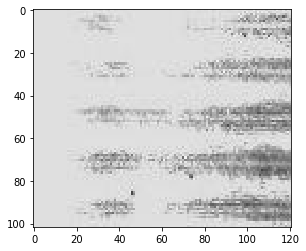

In [120]:
plt.imshow(mpimg.imread(processedimage_path[len(processedimage_path)//5 + hh])[:, 0:121], cmap='gray')

In [116]:
mpimg.imread(processedimage_path[len(processedimage_path)//5 + hh]).shape

(102, 363, 3)

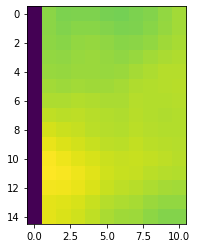

In [416]:
x = img
preds = model.predict(x)
pred_class = np.argmax(preds[0])

# 取得影像分類名稱
pred_class_name = {0: "PCA", 1: "noise"}

# 預測分類的輸出向量
pred_output = model.output[:, pred_class]

# 最後一層 convolution layer 輸出的 feature map
# ResNet 的最後一層 convolution layer
last_conv_layer = model.get_layer('conv2d_6')

# 求得分類的神經元對於最後一層 convolution layer 的梯度
grads = K.gradients(pred_output, last_conv_layer.output)[0]

# 求得針對每個 feature map 的梯度加總
pooled_grads = K.sum(grads, axis=(2, 1))

# K.function() 讓我們可以藉由輸入影像至 `model.input` 得到 `pooled_grads` 與
# `last_conv_layer[0]` 的輸出值，像似在 Tensorflow 中定義計算圖後使用 feed_dict
# 的方式。
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 傳入影像矩陣 x，並得到分類對 feature map 的梯度與最後一層 convolution layer 的 
# feature map
pooled_grads_value, conv_layer_output_value = iterate([x])

# 將 feature map 乘以權重，等於該 feature map 中的某些區域對於該分類的重要性
for i in range(pooled_grads_value.shape[0]):
    conv_layer_output_value[:,  i] *= (pooled_grads_value[i])
    
# 計算 feature map 的 channel-wise 加總
heatmap = np.sum(conv_layer_output_value, axis=-1)
plt.imshow(heatmap)

In [193]:
conv_layer_output_value.shape

(15, 11, 128)

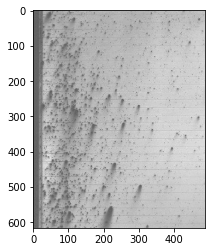

In [187]:
plt.imshow(mpimg.imread(img_path))

In [182]:
pooled_grads_value[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [169]:
grads

<tf.Tensor 'gradients_41/flatten_1/Reshape_grad/Reshape:0' shape=(?, 15, 11, 128) dtype=float32>

In [170]:
pred_output

<tf.Tensor 'strided_slice_87:0' shape=(?,) dtype=float32>

In [171]:
last_conv_layer.output[0]

<tf.Tensor 'strided_slice_89:0' shape=(15, 11, 128) dtype=float32>

In [172]:
pooled_grads_value.shape[0]

11

In [173]:
conv_layer_output_value

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [174]:
pooled_grads

<tf.Tensor 'Sum_41:0' shape=(11, 128) dtype=float32>

In [175]:
grads

<tf.Tensor 'gradients_41/flatten_1/Reshape_grad/Reshape:0' shape=(?, 15, 11, 128) dtype=float32>

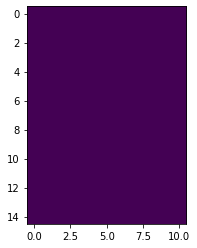

In [176]:
plt.imshow(heatmap)

In [139]:
pred_class_name

{0: 'PCA', 1: 'noise'}

resnet 50

In [130]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Training parameters
# batch_size = 2  # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 2

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True # default = True

In [131]:
# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------

In [132]:
n = 3

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 1

In [133]:
# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

In [134]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [150]:
def resnet_layer(inputs,
                 num_filters=32,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [153]:
def resnet_v1(input_shape, depth, num_classes=2):
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 32
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [154]:
input_shape=image_list[0].shape

if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

from keras.utils import multi_gpu_model

# model = multi_gpu_model(model, gpus=2)
# print("hehe")  
    
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()
print(model_type)

Learning rate:  0.001
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 617, 487, 3)  0                                            
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 617, 487, 32) 896         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 617, 487, 32) 128         conv2d_55[0][0]                  
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 617, 487, 32) 0           batch_normalization_45[0][0]     
_______________________________________________________________________________________

In [155]:
input_shape

(617, 487, 3)

In [157]:
# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train, batch_size=2),
                        validation_data=(x_test, y_test),
                        steps_per_epoch=len(x_train)/8,
                        epochs=epochs, verbose=1, workers=4
                       )
#                         callbacks=callbacks)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/200
350/350 [==============================] - 120s 342ms/step - loss: 8.3660 - acc: 0.4971 - val_loss: 8.5149 - val_acc: 0.4867
Epoch 2/200
 68/350 [====>.........................] - ETA: 59s - loss: 9.5973 - acc: 0.4191

KeyboardInterrupt: 